Extracting parameters from ourdata/data/sub106/session1.vhdr...
Setting channel info structure...
Reading 0 ... 1372335  =      0.000 ...  5489.340 secs...
=== Raw Data Information ===
<RawBrainVision | session1.eeg, 9 x 1372336 (5489.3 s), ~94.2 MiB, data loaded>
Channel names: ['C3', 'C4', 'Cz', 'EOG1', 'EOG2', 'EMG1', 'EMG2', 'Aux1', 'Aux2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)



22-Apr-25 20:45:57 | WARNING | Hypnogram is SHORTER than data by 29.34 seconds. Padding hypnogram with last value to match data.size.


Data shape: (9, 548934)
Remaining channels: ['C3', 'C4', 'Cz']

=== Ground Truth Hypnogram ===
   Unnamed: 0 Stage
0           0     W
1           1     W
2           2     W
3           3     W
4           4     W
Length of upsampled ground truth hypnogram: 548934

=== Method 2: Using Cz-C3 Difference ===
Creating RawArray with float64 data, n_channels=1, n_times=548934
    Range : 0 ... 548933 =      0.000 ...  5489.330 secs
Ready.


22-Apr-25 20:45:57 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
22-Apr-25 20:45:57 | WARNING | Hypnogram is SHORTER than data by 29.34 seconds. Padding hypnogram with last value to match data.size.



=== Method 3: Using Cz Only ===


22-Apr-25 20:45:57 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
22-Apr-25 20:45:57 | WARNING | Hypnogram is SHORTER than data by 29.34 seconds. Padding hypnogram with last value to match data.size.
C:\Users\Ho Lab\AppData\Local\Temp\ipykernel_11988\1723651870.py:135: RuntimeWarning: invalid value encountered in divide
  cm_method2_norm = cm_method2.astype('float') / cm_method2.sum(axis=1)[:, np.newaxis]
C:\Users\Ho Lab\AppData\Local\Temp\ipykernel_11988\1723651870.py:136: R


=== Accuracy Calculation ===
Method 2 (Cz-C3diff) Accuracy: 0.5110 (51.10%)
Method 3 (Cz only) Accuracy: 0.3407 (34.07%)
Method 2 (Cz-C3diff) Cohen's Kappa: 0.3519
Method 3 (Cz only) Cohen's Kappa: 0.1254


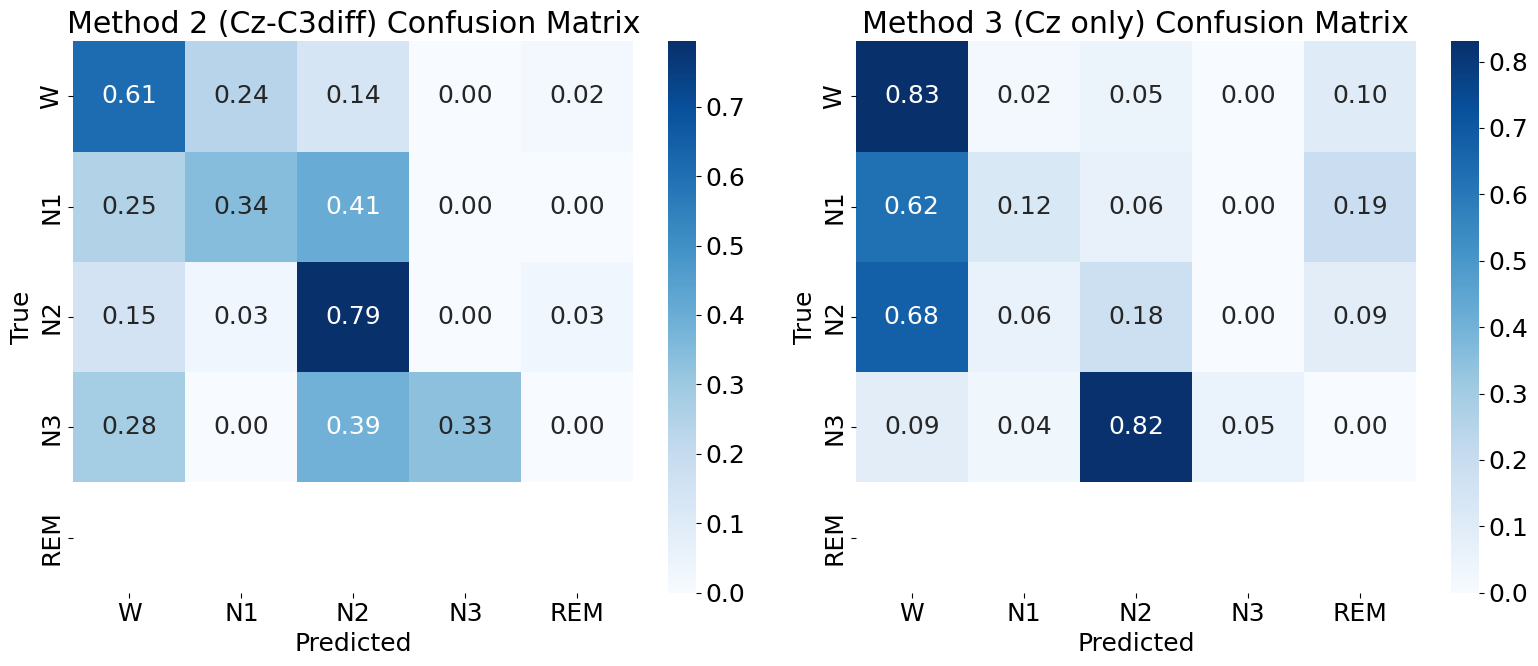

C:\Users\Ho Lab\AppData\Local\Temp\ipykernel_11988\1723651870.py:181: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


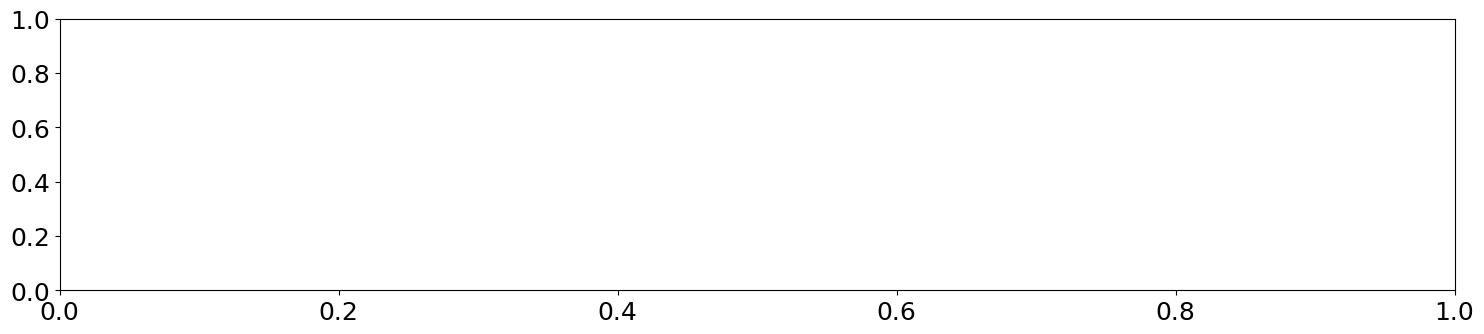

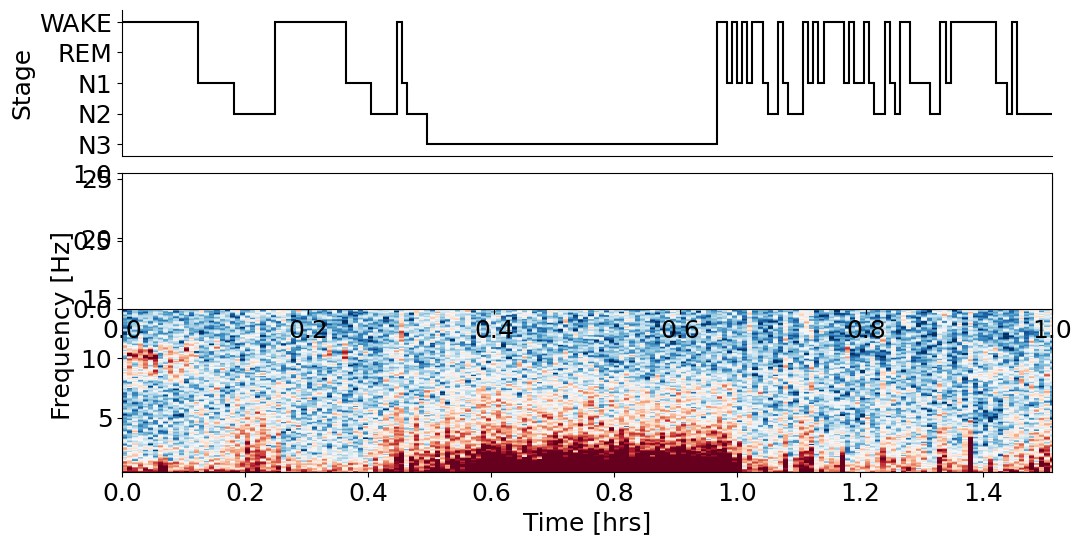

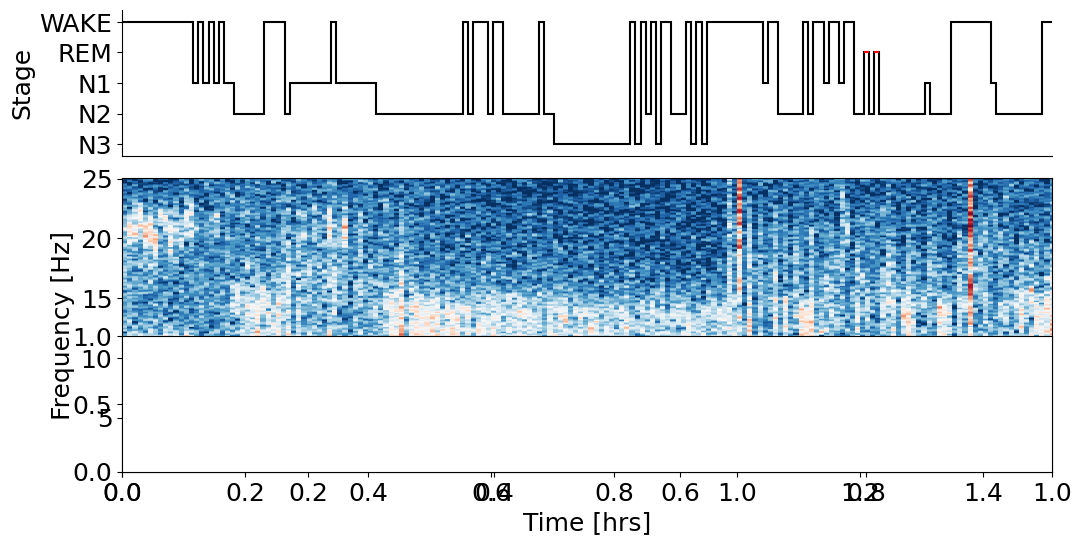

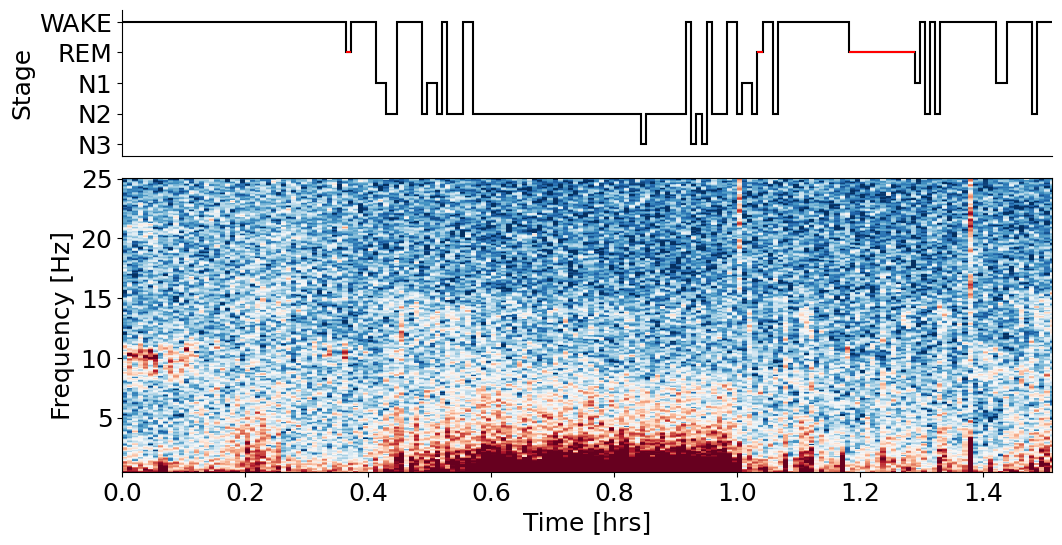

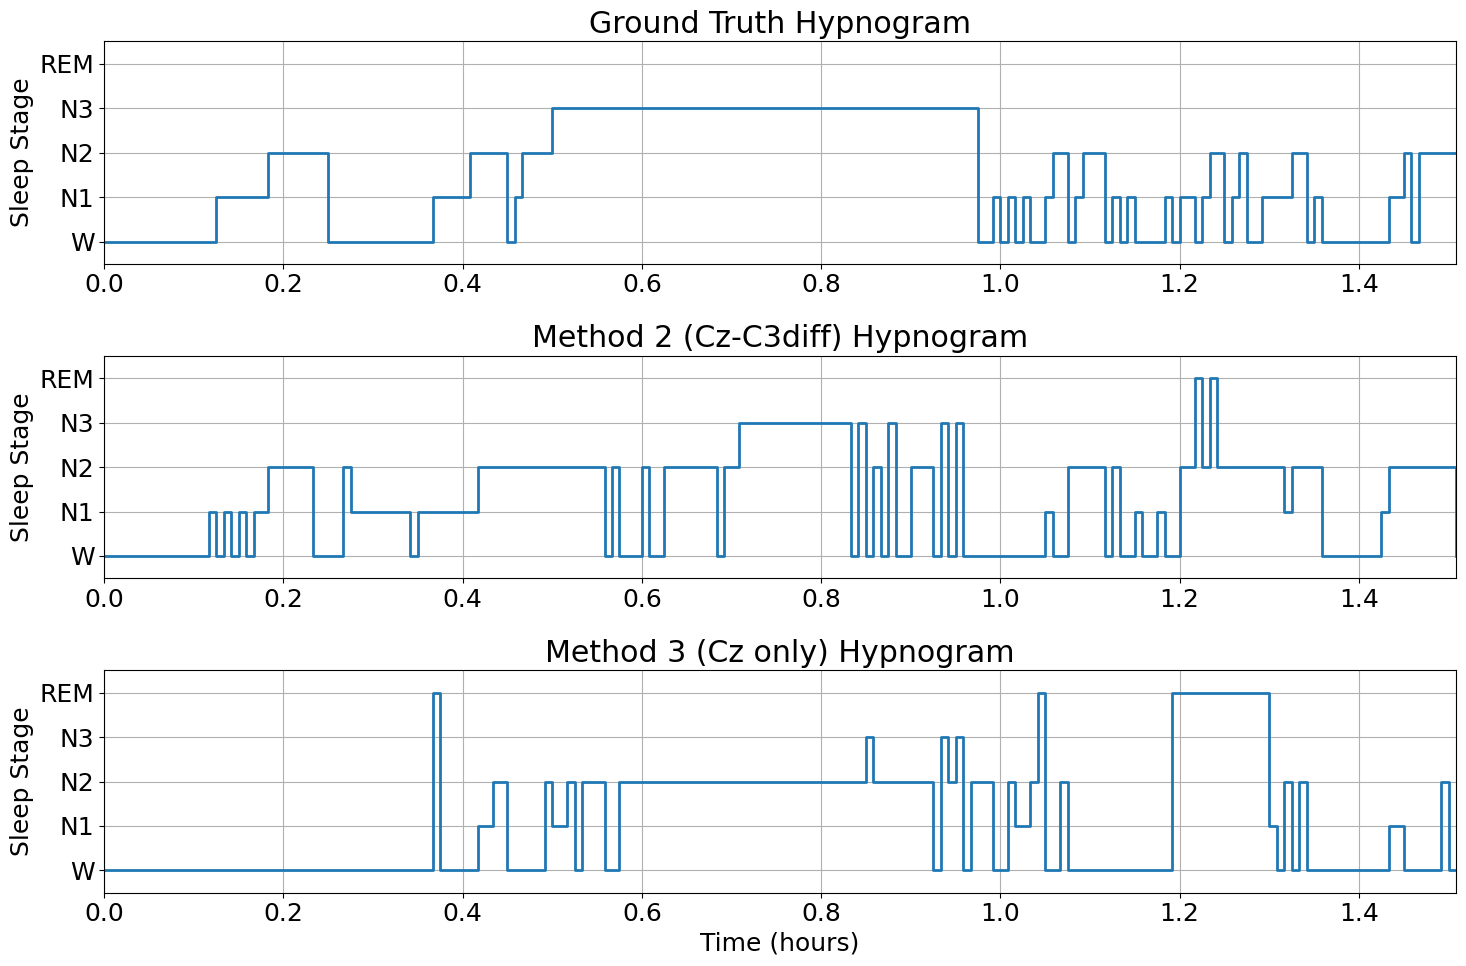


=== Stage-wise Accuracy ===
Wake Stage:
  Method 2 (Cz-C3diff) Accuracy: 0.6102 (61.02%)
  Method 3 (Cz only) Accuracy: 0.8305 (83.05%)
N1 Stage:
  Method 2 (Cz-C3diff) Accuracy: 0.3438 (34.38%)
  Method 3 (Cz only) Accuracy: 0.1250 (12.50%)
N2 Stage:
  Method 2 (Cz-C3diff) Accuracy: 0.7941 (79.41%)
  Method 3 (Cz only) Accuracy: 0.1765 (17.65%)
N3 Stage:
  Method 2 (Cz-C3diff) Accuracy: 0.3333 (33.33%)
  Method 3 (Cz only) Accuracy: 0.0526 (5.26%)


In [45]:
import mne
import yasa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# =============== DATA LOADING ===============
# For BrainVision format (provide path to .vhdr file)
raw = mne.io.read_raw_brainvision('ourdata/data/sub106/session1.vhdr', preload=True)

# Display information about the raw data
print("=== Raw Data Information ===")
print(raw)
print("Channel names:", raw.ch_names)

# =============== PREPROCESSING ===============
# Resample to 100 Hz
raw.resample(100)
# Filter between 0.3 and 45 Hz
raw.filter(0.3, 45)
# Get sampling frequency
sf = raw.info['sfreq']
# Get data in microvolts
data = raw.get_data(units="uV")
print("Data shape:", data.shape)

# Drop non-EEG channels if they exist
channels_to_drop = ['EOG1', 'EOG2', 'EMG1', 'EMG2', 'Aux1', 'Aux2']
existing_channels = [ch for ch in channels_to_drop if ch in raw.ch_names]
if existing_channels:
    raw.drop_channels(existing_channels)

# Get updated channel names
chan = raw.ch_names
print("Remaining channels:", chan)

# =============== GROUND TRUTH (METHOD 1) ===============
# Load ground truth hypnogram
hypno = pd.read_csv("ourdata/Staging/data/session1/sub106_after_correct_df_pred.csv")
print("\n=== Ground Truth Hypnogram ===")
print(hypno.head())

# Create a mapping dictionary
stage_map = {
    'W': 0,   # Wake
    'N1': 1,  # N1 sleep
    'N2': 2,  # N2 sleep
    'N3': 3,  # N3 sleep
    'R': 4    # REM sleep
}

# Apply the mapping to create a new column
hypno['Stage_Numeric'] = hypno['Stage'].map(stage_map)
ground_truth = hypno.Stage_Numeric.values

# Upsample ground truth for visualization
hypno_up_gt = yasa.hypno_upsample_to_data(hypno.Stage_Numeric, sf_hypno=1/30, data=raw)
print("Length of upsampled ground truth hypnogram:", len(hypno_up_gt))

# =============== METHOD 2: CZ-C3 DIFFERENCE ===============
print("\n=== Method 2: Using Cz-C3 Difference ===")
# Check if Cz and C3 exist in channels
if "Cz" in chan and "C3" in chan:
    # Get indices for Cz and C3
    cz_idx = chan.index("Cz")
    c3_idx = chan.index("C3")
    
    # Calculate the difference between Cz and C3
    cz_c3_diff = data[cz_idx] - data[c3_idx]
    
    # Create a copy of raw to avoid modifying the original
    raw_method2 = raw.copy()
    
    # Add this as a new channel to the raw object
    new_ch_info = mne.create_info(['Cz-C3diff'], raw.info['sfreq'], ['eeg'])
    diff_raw = mne.io.RawArray(cz_c3_diff.reshape(1, -1), new_ch_info)
    raw_method2.add_channels([diff_raw], force_update_info=True)
    
    # Use this new channel for sleep staging
    sls_method2 = yasa.SleepStaging(raw_method2, eeg_name="Cz-C3diff")
    hypno_pred_method2 = sls_method2.predict()
    hypno_pred_method2_int = yasa.hypno_str_to_int(hypno_pred_method2)
    
    # Upsample for visualization
    hypno_up_method2 = yasa.hypno_upsample_to_data(hypno_pred_method2_int, sf_hypno=1/30, data=raw)
else:
    print("Error: Cz or C3 channel not found in the data.")
    hypno_pred_method2_int = np.array([])

# =============== METHOD 3: CZ ONLY ===============
print("\n=== Method 3: Using Cz Only ===")
if "Cz" in chan:
    # Use Cz channel for sleep staging
    sls_method3 = yasa.SleepStaging(raw, eeg_name="Cz")
    hypno_pred_method3 = sls_method3.predict()
    hypno_pred_method3_int = yasa.hypno_str_to_int(hypno_pred_method3)
    
    # Upsample for visualization
    hypno_up_method3 = yasa.hypno_upsample_to_data(hypno_pred_method3_int, sf_hypno=1/30, data=raw)
else:
    print("Error: Cz channel not found in the data.")
    hypno_pred_method3_int = np.array([])

# =============== ACCURACY CALCULATION ===============
print("\n=== Accuracy Calculation ===")
# Make sure all hypnograms have the same length
if len(hypno_pred_method2_int) > 0 and len(hypno_pred_method3_int) > 0:
    min_length = min(len(ground_truth), len(hypno_pred_method2_int), len(hypno_pred_method3_int))
    ground_truth_trimmed = ground_truth[:min_length]
    hypno_pred_method2_int_trimmed = hypno_pred_method2_int[:min_length]
    hypno_pred_method3_int_trimmed = hypno_pred_method3_int[:min_length]
    
    # Calculate accuracy and Cohen's kappa
    accuracy_method2 = accuracy_score(ground_truth_trimmed, hypno_pred_method2_int_trimmed)
    accuracy_method3 = accuracy_score(ground_truth_trimmed, hypno_pred_method3_int_trimmed)
    
    kappa_method2 = cohen_kappa_score(ground_truth_trimmed, hypno_pred_method2_int_trimmed)
    kappa_method3 = cohen_kappa_score(ground_truth_trimmed, hypno_pred_method3_int_trimmed)
    
    print(f"Method 2 (Cz-C3diff) Accuracy: {accuracy_method2:.4f} ({accuracy_method2*100:.2f}%)")
    print(f"Method 3 (Cz only) Accuracy: {accuracy_method3:.4f} ({accuracy_method3*100:.2f}%)")
    print(f"Method 2 (Cz-C3diff) Cohen's Kappa: {kappa_method2:.4f}")
    print(f"Method 3 (Cz only) Cohen's Kappa: {kappa_method3:.4f}")
    
    # Create confusion matrices
    cm_method2 = confusion_matrix(ground_truth_trimmed, hypno_pred_method2_int_trimmed)
    cm_method3 = confusion_matrix(ground_truth_trimmed, hypno_pred_method3_int_trimmed)
    
    # Normalize confusion matrices
    cm_method2_norm = cm_method2.astype('float') / cm_method2.sum(axis=1)[:, np.newaxis]
    cm_method3_norm = cm_method3.astype('float') / cm_method3.sum(axis=1)[:, np.newaxis]
    
    # =============== VISUALIZATION ===============
    # Plot confusion matrices
    plt.figure(figsize=(16, 7))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(cm_method2_norm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=['W', 'N1', 'N2', 'N3', 'REM'],
                yticklabels=['W', 'N1', 'N2', 'N3', 'REM'])
    plt.title('Method 2 (Cz-C3diff) Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.subplot(1, 2, 2)
    sns.heatmap(cm_method3_norm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=['W', 'N1', 'N2', 'N3', 'REM'],
                yticklabels=['W', 'N1', 'N2', 'N3', 'REM'])
    plt.title('Method 3 (Cz only) Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.tight_layout()
    plt.savefig('confusion_matrices.png', dpi=300)
    plt.show()
    
    # Plot spectrograms with hypnograms
    if "C3" in chan:
        plt.figure(figsize=(18, 12))
        
        # Ground Truth
        plt.subplot(3, 1, 1)
        yasa.plot_spectrogram(data[chan.index("C3")], sf, hypno_up_gt
                        )
        
        # Method 2
        plt.subplot(3, 1, 2)
        yasa.plot_spectrogram(cz_c3_diff, sf, hypno_up_method2
                             )
        
        # Method 3
        plt.subplot(3, 1, 3)
        yasa.plot_spectrogram(data[chan.index("C3")], sf, hypno_up_method3
                            )
        
        plt.tight_layout()
        plt.savefig('spectrograms_comparison.png', dpi=300)
        plt.show()
    
    # Plot hypnograms for comparison
    plt.figure(figsize=(15, 10))
    
    # Create time array (assuming 30-second epochs)
    time_hrs = np.arange(len(ground_truth_trimmed)) * 30 / 3600
    
    plt.subplot(3, 1, 1)
    plt.step(time_hrs, ground_truth_trimmed, where='post', linewidth=2)
    plt.title('Ground Truth Hypnogram')
    plt.ylabel('Sleep Stage')
    plt.yticks([0, 1, 2, 3, 4], ['W', 'N1', 'N2', 'N3', 'REM'])
    plt.xlim(0, time_hrs[-1])
    plt.ylim(-0.5, 4.5)
    plt.grid(True)
    
    plt.subplot(3, 1, 2)
    plt.step(time_hrs, hypno_pred_method2_int_trimmed, where='post', linewidth=2)
    plt.title('Method 2 (Cz-C3diff) Hypnogram')
    plt.ylabel('Sleep Stage')
    plt.yticks([0, 1, 2, 3, 4], ['W', 'N1', 'N2', 'N3', 'REM'])
    plt.xlim(0, time_hrs[-1])
    plt.ylim(-0.5, 4.5)
    plt.grid(True)
    
    plt.subplot(3, 1, 3)
    plt.step(time_hrs, hypno_pred_method3_int_trimmed, where='post', linewidth=2)
    plt.title('Method 3 (Cz only) Hypnogram')
    plt.ylabel('Sleep Stage')
    plt.yticks([0, 1, 2, 3, 4], ['W', 'N1', 'N2', 'N3', 'REM'])
    plt.xlim(0, time_hrs[-1])
    plt.ylim(-0.5, 4.5)
    plt.grid(True)
    plt.xlabel('Time (hours)')
    
    plt.tight_layout()
    plt.savefig('hypnograms_comparison.png', dpi=300)
    plt.show()
    
    # Calculate stage-wise accuracy
    print("\n=== Stage-wise Accuracy ===")
    stages = [0, 1, 2, 3, 4]
    stage_names = ['Wake', 'N1', 'N2', 'N3', 'REM']
    
    for i, stage in enumerate(stages):
        # Get indices where ground truth is the current stage
        idx = ground_truth_trimmed == stage
        if np.sum(idx) > 0:
            # Calculate accuracy for this stage
            acc_method2 = np.mean(hypno_pred_method2_int_trimmed[idx] == stage)
            acc_method3 = np.mean(hypno_pred_method3_int_trimmed[idx] == stage)
            
            print(f"{stage_names[i]} Stage:")
            print(f"  Method 2 (Cz-C3diff) Accuracy: {acc_method2:.4f} ({acc_method2*100:.2f}%)")
            print(f"  Method 3 (Cz only) Accuracy: {acc_method3:.4f} ({acc_method3*100:.2f}%)")
else:
    print("Cannot calculate accuracy: One or more hypnograms are empty.")

Processing subjects:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting parameters from ourdata/data/sub106/session1.vhdr...
Setting channel info structure...
Reading 0 ... 1372335  =      0.000 ...  5489.340 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=548934
    Range : 0 ... 548933 =      0.000 ...  5489.330 secs
Ready.


22-Apr-25 20:53:45 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:53:45 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib


Extracting parameters from ourdata/data/sub106/session2.vhdr...
Setting channel info structure...
Reading 0 ... 1362351  =      0.000 ...  5449.404 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=544941
    Range : 0 ... 544940 =      0.000 ...  5449.400 secs
Ready.


22-Apr-25 20:53:46 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:53:47 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
Processing subjects:  10%|█         | 1/10 [00:02<00:25,  2.81s/it]

Extracting parameters from ourdata/data/sub107/session1.vhdr...
Setting channel info structure...
Reading 0 ... 1370127  =      0.000 ...  5480.508 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=548051
    Range : 0 ... 548050 =      0.000 ...  5480.500 secs
Ready.


22-Apr-25 20:53:48 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:53:48 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib


Extracting parameters from ourdata/data/sub107/session2.vhdr...
Setting channel info structure...
Reading 0 ... 1355855  =      0.000 ...  5423.420 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=542342
    Range : 0 ... 542341 =      0.000 ...  5423.410 secs
Ready.


22-Apr-25 20:53:49 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:53:49 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
Processing subjects:  20%|██        | 2/10 [00:05<00:22,  2.82s/it]

Extracting parameters from ourdata/data/sub114/session1.vhdr...
Setting channel info structure...
Reading 0 ... 1360207  =      0.000 ...  5440.828 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=544083
    Range : 0 ... 544082 =      0.000 ...  5440.820 secs
Ready.


22-Apr-25 20:53:51 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:53:51 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib


Extracting parameters from ourdata/data/sub114/session2.vhdr...
Setting channel info structure...
Reading 0 ... 1352815  =      0.000 ...  5411.260 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=541126
    Range : 0 ... 541125 =      0.000 ...  5411.250 secs
Ready.


22-Apr-25 20:53:52 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:53:52 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
Processing subjects:  30%|███       | 3/10 [00:08<00:19,  2.84s/it]

Extracting parameters from ourdata/data/sub118/session1.vhdr...
Setting channel info structure...
Reading 0 ... 1354783  =      0.000 ...  5419.132 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=541914
    Range : 0 ... 541913 =      0.000 ...  5419.130 secs
Ready.


22-Apr-25 20:53:54 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:53:54 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib


Extracting parameters from ourdata/data/sub118/session2.vhdr...
Setting channel info structure...
Reading 0 ... 1355535  =      0.000 ...  5422.140 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=542214
    Range : 0 ... 542213 =      0.000 ...  5422.130 secs
Ready.


22-Apr-25 20:53:55 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:53:55 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
Processing subjects:  40%|████      | 4/10 [00:11<00:16,  2.82s/it]

Extracting parameters from ourdata/data/sub123/session1.vhdr...
Setting channel info structure...
Reading 0 ... 1368655  =      0.000 ...  5474.620 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=547462
    Range : 0 ... 547461 =      0.000 ...  5474.610 secs
Ready.


22-Apr-25 20:53:56 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:53:57 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib


Extracting parameters from ourdata/data/sub123/session2.vhdr...
Setting channel info structure...
Reading 0 ... 1355583  =      0.000 ...  5422.332 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=542234
    Range : 0 ... 542233 =      0.000 ...  5422.330 secs
Ready.


22-Apr-25 20:53:58 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:53:58 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
Processing subjects:  50%|█████     | 5/10 [00:14<00:14,  2.83s/it]

Extracting parameters from ourdata/data/sub205/session1.vhdr...
Setting channel info structure...
Reading 0 ... 1360735  =      0.000 ...  5442.940 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=544294
    Range : 0 ... 544293 =      0.000 ...  5442.930 secs
Ready.


22-Apr-25 20:53:59 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:54:00 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib


Extracting parameters from ourdata/data/sub205/session2.vhdr...
Setting channel info structure...
Reading 0 ... 1361519  =      0.000 ...  5446.076 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=544608
    Range : 0 ... 544607 =      0.000 ...  5446.070 secs
Ready.


22-Apr-25 20:54:01 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:54:01 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
Processing subjects:  60%|██████    | 6/10 [00:17<00:11,  2.91s/it]

Extracting parameters from ourdata/data/sub206/session1.vhdr...
Setting channel info structure...
Reading 0 ... 1295375  =      0.000 ...  5181.500 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=518150
    Range : 0 ... 518149 =      0.000 ...  5181.490 secs
Ready.


22-Apr-25 20:54:02 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:54:02 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib


Extracting parameters from ourdata/data/sub206/session2.vhdr...
Setting channel info structure...
Reading 0 ... 1476751  =      0.000 ...  5907.004 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=590701
    Range : 0 ... 590700 =      0.000 ...  5907.000 secs
Ready.


22-Apr-25 20:54:04 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:54:04 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
Processing subjects:  70%|███████   | 7/10 [00:20<00:08,  2.89s/it]

Extracting parameters from ourdata/data/sub208/session1.vhdr...
Setting channel info structure...
Reading 0 ... 1355775  =      0.000 ...  5423.100 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=542310
    Range : 0 ... 542309 =      0.000 ...  5423.090 secs
Ready.


22-Apr-25 20:54:05 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:54:05 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib


Extracting parameters from ourdata/data/sub208/session2.vhdr...
Setting channel info structure...
Reading 0 ... 1356319  =      0.000 ...  5425.276 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=542528
    Range : 0 ... 542527 =      0.000 ...  5425.270 secs
Ready.


22-Apr-25 20:54:07 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:54:07 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
Processing subjects:  80%|████████  | 8/10 [00:22<00:05,  2.87s/it]

Extracting parameters from ourdata/data/sub220/session1.vhdr...
Setting channel info structure...
Reading 0 ... 181759  =      0.000 ...   727.036 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=72704
    Range : 0 ... 72703 =      0.000 ...   727.030 secs
Ready.


22-Apr-25 20:54:07 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:54:07 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib


Extracting parameters from ourdata/data/sub220/session2.vhdr...
Setting channel info structure...
Reading 0 ... 1352959  =      0.000 ...  5411.836 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=541184
    Range : 0 ... 541183 =      0.000 ...  5411.830 secs
Ready.


22-Apr-25 20:54:08 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:54:08 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
Processing subjects:  90%|█████████ | 9/10 [00:24<00:02,  2.51s/it]

Extracting parameters from ourdata/data/sub224/session1.vhdr...
Setting channel info structure...
Reading 0 ... 338383  =      0.000 ...  1353.532 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=135354
    Range : 0 ... 135353 =      0.000 ...  1353.530 secs
Ready.


22-Apr-25 20:54:09 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:54:09 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib


Extracting parameters from ourdata/data/sub224/session2.vhdr...
Setting channel info structure...
Reading 0 ... 1356351  =      0.000 ...  5425.404 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)

Creating RawArray with float64 data, n_channels=1, n_times=542541
    Range : 0 ... 542540 =      0.000 ...  5425.400 secs
Ready.


22-Apr-25 20:54:10 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
22-Apr-25 20:54:10 | INFO | Using pre-trained classifier: c:\Users\Ho Lab\Desktop\CRF 2025 - EEG\.venv_eeg\Lib\site-packages\yasa\classifiers\clf_eeg_lgb_0.5.0.joblib
Processing subjects: 100%|██████████| 10/10 [00:26<00:00,  2.65s/it]



=== Aggregated Results ===
Method 2 (Cz-C3diff) Accuracy: 0.4406 ± 0.1526 (44.06% ± 15.26%)
Method 3 (Cz only) Accuracy: 0.3716 ± 0.1855 (37.16% ± 18.55%)
Method 2 (Cz-C3diff) Kappa: 0.2111 ± 0.2347
Method 3 (Cz only) Kappa: 0.1480 ± 0.1795


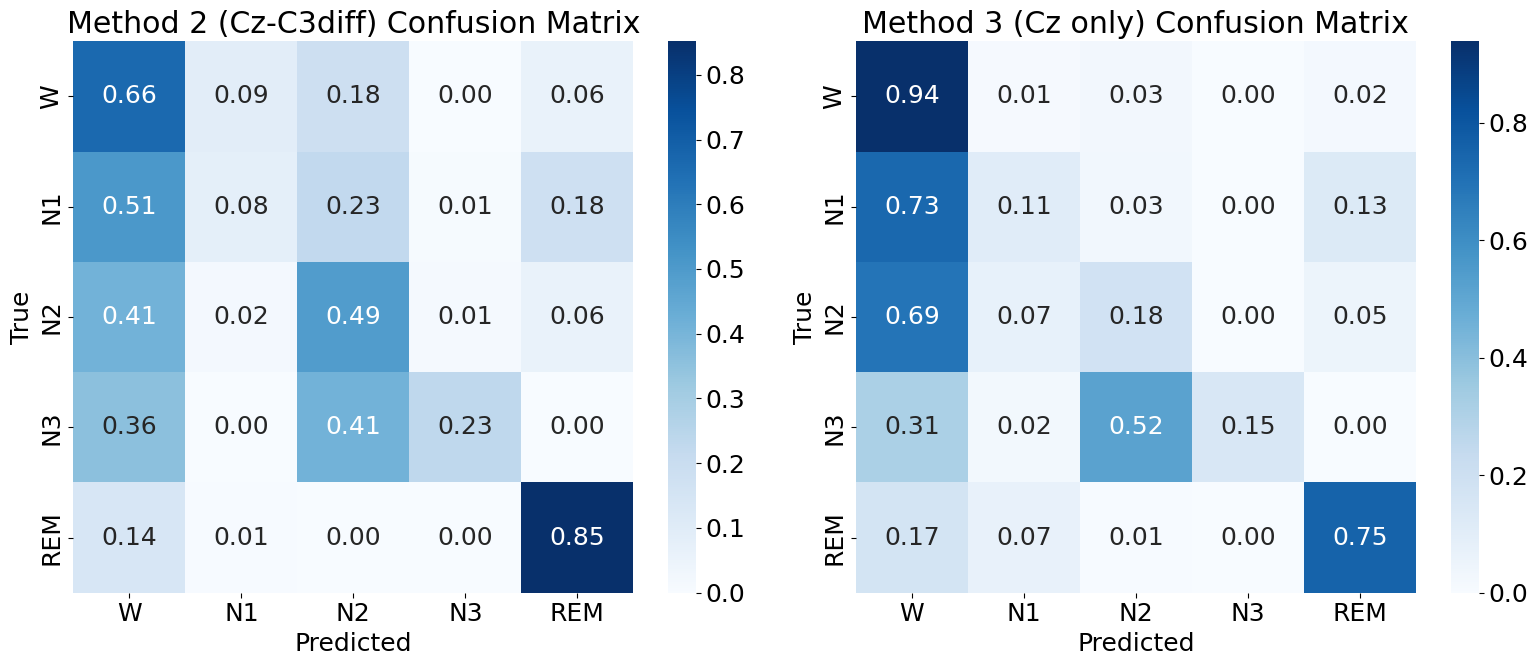


Paired t-test between Method 2 and Method 3:
t-statistic: 1.5571
p-value: 0.1359
Statistically significant difference: False


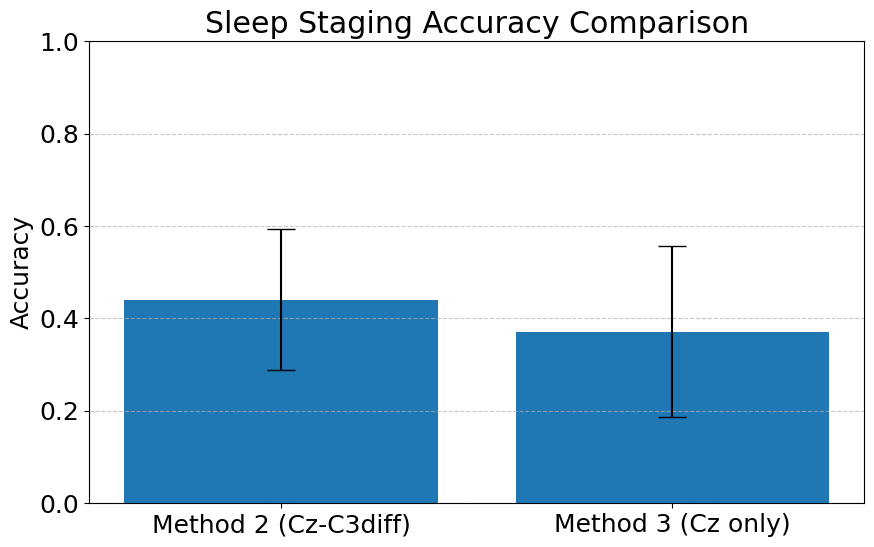


=== Per-Subject Results ===
         accuracy_method2  accuracy_method3
subject                                    
106              0.517925          0.471435
107              0.430525          0.311294
114              0.416667          0.477778
118              0.594444          0.569444
123              0.338462          0.507723
205              0.350829          0.500000
206              0.554639          0.199039
208              0.519444          0.169444
220              0.416667          0.287500
224              0.266667          0.222222


In [ ]:
import mne
import yasa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Define subjects and sessions
subjects = [106, 107, 114, 118, 123, 205, 206, 208, 220, 224]
sessions = [1, 2]

# Create a mapping dictionary for sleep stages
stage_map = {'W': 0, 'N1': 1, 'N2': 2, 'N3': 3, 'R': 4}

# Initialize results DataFrame
results = pd.DataFrame(columns=[
    'subject', 'session', 
    'accuracy_method2', 'accuracy_method3',
    'kappa_method2', 'kappa_method3'
])

# Initialize aggregated confusion matrices
agg_cm_method2 = np.zeros((5, 5))
agg_cm_method3 = np.zeros((5, 5))
count_valid = 0

# Process all subjects and sessions
for subject in tqdm(subjects, desc="Processing subjects"):
    for session in sessions:
        try:
            # Construct file paths
            eeg_path = f'ourdata/data/sub{subject}/session{session}.vhdr'
            hypno_path = f'ourdata/Staging/data/session{session}/sub{subject}_after_correct_df_pred.csv'
            
            # Check if files exist
            if not os.path.exists(eeg_path) or not os.path.exists(hypno_path):
                continue
            
            # Load EEG data
            raw = mne.io.read_raw_brainvision(eeg_path, preload=True)
            
            # Preprocess
            raw.resample(100)
            raw.filter(0.3, 45)
            sf = raw.info['sfreq']
            data = raw.get_data(units="uV")
                
            # Drop non-EEG channels if they exist
            channels_to_drop = ['EOG1', 'EOG2', 'EMG1', 'EMG2', 'Aux1', 'Aux2']
            existing_channels = [ch for ch in channels_to_drop if ch in raw.ch_names]
            if existing_channels:
                raw.drop_channels(existing_channels)
            
            # Get updated channel names
            chan = raw.ch_names
            
            # Check if required channels exist
            if "Cz" not in chan or "C3" not in chan:
                continue
            
            # Load ground truth hypnogram
            hypno = pd.read_csv(hypno_path)
            
            # Apply the mapping to create a new column
            hypno['Stage_Numeric'] = hypno['Stage'].map(stage_map)
            ground_truth = hypno.Stage_Numeric.values
            
            # METHOD 2: CZ-C3 DIFFERENCE
            cz_idx = chan.index("Cz")
            c3_idx = chan.index("C3")
            cz_c3_diff = data[cz_idx] - data[c3_idx]
            
            raw_method2 = raw.copy()
            new_ch_info = mne.create_info(['Cz-C3diff'], raw.info['sfreq'], ['eeg'])
            diff_raw = mne.io.RawArray(cz_c3_diff.reshape(1, -1), new_ch_info)
            raw_method2.add_channels([diff_raw], force_update_info=True)
            
            sls_method2 = yasa.SleepStaging(raw_method2, eeg_name="Cz-C3diff")
            hypno_pred_method2 = sls_method2.predict()
            hypno_pred_method2_int = yasa.hypno_str_to_int(hypno_pred_method2)
            
            # METHOD 3: CZ ONLY
            sls_method3 = yasa.SleepStaging(raw, eeg_name="Cz")
            hypno_pred_method3 = sls_method3.predict()
            hypno_pred_method3_int = yasa.hypno_str_to_int(hypno_pred_method3)
            
            # Make sure all hypnograms have the same length
            min_length = min(len(ground_truth), len(hypno_pred_method2_int), len(hypno_pred_method3_int))
            ground_truth_trimmed = ground_truth[:min_length]
            hypno_pred_method2_int_trimmed = hypno_pred_method2_int[:min_length]
            hypno_pred_method3_int_trimmed = hypno_pred_method3_int[:min_length]
            
            # Calculate accuracy and Cohen's kappa
            accuracy_method2 = accuracy_score(ground_truth_trimmed, hypno_pred_method2_int_trimmed)
            accuracy_method3 = accuracy_score(ground_truth_trimmed, hypno_pred_method3_int_trimmed)
            
            kappa_method2 = cohen_kappa_score(ground_truth_trimmed, hypno_pred_method2_int_trimmed)
            kappa_method3 = cohen_kappa_score(ground_truth_trimmed, hypno_pred_method3_int_trimmed)
            
            # Create confusion matrices
            cm_method2 = confusion_matrix(ground_truth_trimmed, hypno_pred_method2_int_trimmed, labels=[0, 1, 2, 3, 4])
            cm_method3 = confusion_matrix(ground_truth_trimmed, hypno_pred_method3_int_trimmed, labels=[0, 1, 2, 3, 4])
            
            # Add to aggregated confusion matrices
            agg_cm_method2 += cm_method2
            agg_cm_method3 += cm_method3
            count_valid += 1
            
            # Save results
            results = pd.concat([results, pd.DataFrame([{
                'subject': subject,
                'session': session,
                'accuracy_method2': accuracy_method2,
                'accuracy_method3': accuracy_method3,
                'kappa_method2': kappa_method2,
                'kappa_method3': kappa_method3
            }])], ignore_index=True)
            
        except Exception as e:
            print(f"Error processing subject {subject}, session {session}: {e}")
            continue

# Save detailed results to CSV
results.to_csv('sleep_staging_accuracy_results.csv', index=False)

# Calculate aggregated results
print("\n=== Aggregated Results ===")
mean_acc_method2 = results['accuracy_method2'].mean()
mean_acc_method3 = results['accuracy_method3'].mean()
std_acc_method2 = results['accuracy_method2'].std()
std_acc_method3 = results['accuracy_method3'].std()

print(f"Method 2 (Cz-C3diff) Accuracy: {mean_acc_method2:.4f} ± {std_acc_method2:.4f} ({mean_acc_method2*100:.2f}% ± {std_acc_method2*100:.2f}%)")
print(f"Method 3 (Cz only) Accuracy: {mean_acc_method3:.4f} ± {std_acc_method3:.4f} ({mean_acc_method3*100:.2f}% ± {std_acc_method3*100:.2f}%)")

print(f"Method 2 (Cz-C3diff) Kappa: {results['kappa_method2'].mean():.4f} ± {results['kappa_method2'].std():.4f}")
print(f"Method 3 (Cz only) Kappa: {results['kappa_method3'].mean():.4f} ± {results['kappa_method3'].std():.4f}")

# Normalize aggregated confusion matrices
agg_cm_method2_norm = agg_cm_method2.astype('float') / agg_cm_method2.sum(axis=1)[:, np.newaxis]
agg_cm_method3_norm = agg_cm_method3.astype('float') / agg_cm_method3.sum(axis=1)[:, np.newaxis]

# Plot aggregated confusion matrices
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.heatmap(agg_cm_method2_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['W', 'N1', 'N2', 'N3', 'REM'],
            yticklabels=['W', 'N1', 'N2', 'N3', 'REM'])
plt.title('Method 2 (Cz-C3diff) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(agg_cm_method3_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['W', 'N1', 'N2', 'N3', 'REM'],
            yticklabels=['W', 'N1', 'N2', 'N3', 'REM'])
plt.title('Method 3 (Cz only) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.savefig('aggregated_confusion_matrices.png', dpi=300)
plt.show()

# Statistical test to compare methods
from scipy import stats
t_stat, p_value = stats.ttest_rel(results['accuracy_method2'], results['accuracy_method3'])
print(f"\nPaired t-test between Method 2 and Method 3:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Statistically significant difference: {p_value < 0.05}")

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(['Method 2 (Cz-C3diff)', 'Method 3 (Cz only)'], 
        [mean_acc_method2, mean_acc_method3],
        yerr=[std_acc_method2, std_acc_method3],
        capsize=10)
plt.ylabel('Accuracy')
plt.title('Sleep Staging Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('accuracy_comparison.png', dpi=300)
plt.show()

# Print per-subject results
print("\n=== Per-Subject Results ===")
subject_results = results.groupby('subject')[['accuracy_method2', 'accuracy_method3']].mean()
print(subject_results)